In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LIBRARY IMPORT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import warnings
from imblearn.over_sampling import SMOTENC

## DATA IMPORT

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS PROJECT/Project_08_FraudAnalysis/fraudTest.csv')

## EDA

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df.merchant.value_counts()

,count
merchant,
fraud_Kilback LLC,1859
fraud_Cormier LLC,1597
fraud_Schumm PLC,1561
fraud_Kuhn LLC,1521
fraud_Dickinson Ltd,1519
...,...
fraud_Treutel-King,323
fraud_Satterfield-Lowe,319
fraud_Kessler Group,318


In [ ]:
len(df.merchant.unique())

693

In [ ]:
top_merchants = df.merchant.value_counts()
top_merchants = top_merchants[top_merchants>1200]
top_merchants

,count
merchant,
fraud_Kilback LLC,1859
fraud_Cormier LLC,1597
fraud_Schumm PLC,1561
fraud_Kuhn LLC,1521
fraud_Dickinson Ltd,1519
fraud_Boyer PLC,1506
fraud_Emard Inc,1226
fraud_Parisian and Sons,1202


In [ ]:
df.job.value_counts()

,count
job,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
...,...
Estate manager/land agent,195
"Engineer, civil (consulting)",194
Operational investment banker,11


In [ ]:
top_jobs = df.job.value_counts()
top_jobs = top_jobs[top_jobs > 3200]
top_jobs

,count
job,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
Materials engineer,3441
Environmental consultant,3427
Financial adviser,3304
IT trainer,3264


In [ ]:
df.state.value_counts()

,count
state,
TX,40393
NY,35918
PA,34326
CA,24135
OH,20147
MI,19671
IL,18960
FL,18104
AL,17532


In [ ]:
len(df.state.unique())

50

In [ ]:
df.is_fraud.value_counts()

,count
is_fraud,
0,553574
1,2145


<Axes: xlabel='is_fraud'>

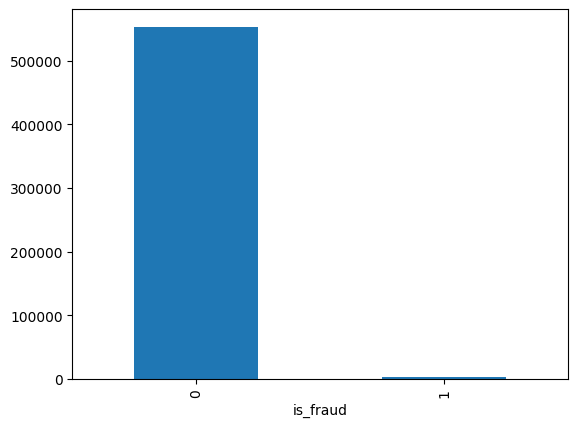

In [ ]:
df['is_fraud'].value_counts().plot(kind='bar')

In [ ]:
df.category.value_counts()

,count
category,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


<Axes: xlabel='category'>

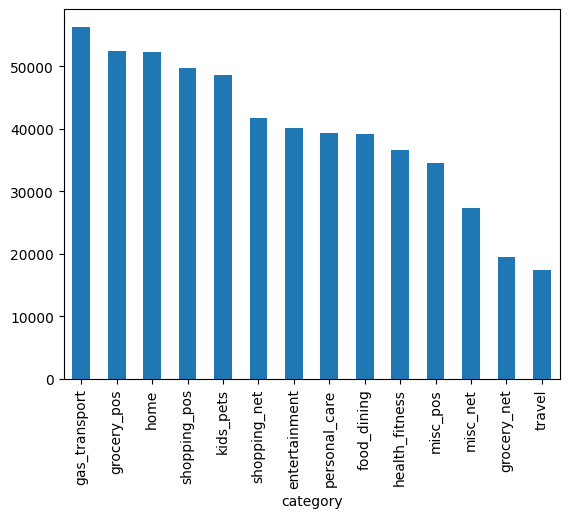

In [ ]:
df.category.value_counts().plot(kind = 'bar')

## DROP USELESS FEATURES

In [ ]:
df =  df.drop(["Unnamed: 0", "cc_num", "trans_num", "trans_date_trans_time", "dob",
                 "first", "last", "street", "city", "zip"],axis = 1)

In [ ]:
df.head()

,merchant,category,amt,gender,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,MI,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [ ]:
y = df.pop('is_fraud')

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
df.merchant.value_counts().nlargest(50).index

Index(['fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC',
       'fraud_Kuhn LLC', 'fraud_Dickinson Ltd', 'fraud_Boyer PLC',
       'fraud_Emard Inc', 'fraud_Parisian and Sons', 'fraud_Corwin-Collins',
       'fraud_Streich, Hansen and Veum', 'fraud_Robel, Cummerata and Prosacco',
       'fraud_Schaefer, McGlynn and Bosco', 'fraud_Zieme, Bode and Dooley',
       'fraud_Huels-Hahn', 'fraud_Kling Inc', 'fraud_Raynor, Feest and Miller',
       'fraud_Reilly, Heaney and Cole', 'fraud_Ledner-Pfannerstill',
       'fraud_Mraz-Herzog', 'fraud_Raynor, Reinger and Hagenes',
       'fraud_Koss and Sons', 'fraud_Eichmann, Bogan and Rodriguez',
       'fraud_Harris Inc', 'fraud_Greenholt, Jacobi and Gleason',
       'fraud_Erdman-Kertzmann', 'fraud_Friesen-D'Amore',
       'fraud_Prohaska-Murray', 'fraud_Bins-Rice', 'fraud_Brekke and Sons',
       'fraud_Torp-Labadie', 'fraud_Rodriguez Group', 'fraud_Sporer Inc',
       'fraud_Harber Inc', 'fraud_Lind, Huel and McClure',
       'fraud_C

In [ ]:
def reduce_cardinality(df, col, threshold=50):
    top = df[col].value_counts().nlargest(threshold).index
    df[col] = df[col].where(df[col].isin(top), 'Other')
    return df

In [ ]:
for col in categorical_cols:
        df[col] = df[col].astype(str)
        df = reduce_cardinality(df, col, threshold=50)

In [ ]:
categorical_ind = [df.columns.get_loc(col) for col in categorical_cols]

In [ ]:
smote = SMOTENC(categorical_features=categorical_ind, random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(df, y)

In [ ]:
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

In [ ]:
X_encoded = preprocessor.fit_transform(X_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resampled, test_size=0.2, random_state=42)

In [ ]:
models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1),
        "Random Forest": RandomForestClassifier(n_jobs=-1, n_estimators=50)
    }

In [ ]:
results = {}
best_model, best_auc = None, 0
for name, model in models.items():
    model.fit(X_train, y_train)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = (accuracy_score(y_test, model.predict(X_test)), auc_score)
    if auc_score > best_auc:
        best_model, best_auc = model, auc_score

In [ ]:
ann = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
ann.fit(X_train, y_train, epochs=1, batch_size=2, verbose=0)
ann_accuracy, ann_auc = ann.evaluate(X_test, y_test, verbose=0)[1], ann.evaluate(X_test, y_test, verbose=0)[2]
results["ANN"] = (ann_accuracy, ann_auc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_auc

0.990912139415741

In [ ]:
best_auc

np.float64(0.9999525213706337)

In [ ]:
for name, (acc, auc) in results.items():
        print(f"{name}: Accuracy = {acc:.4f}, AUC = {auc:.4f}")

Logistic Regression: Accuracy = 0.8758, AUC = 0.9429
Random Forest: Accuracy = 0.9978, AUC = 1.0000
ANN: Accuracy = 0.9523, AUC = 0.9909
